# 1. 계산기 패키지 만들기

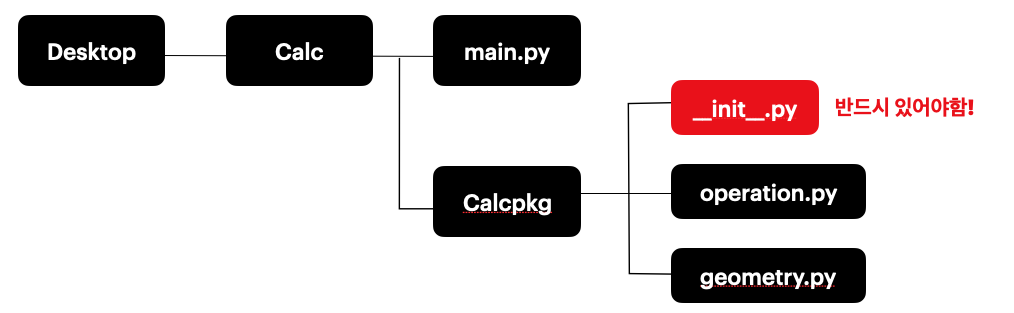

In [ ]:
# 코랩 환경에서 해당 구조를 만든다.

## 1.1. Calcpkg 안에 geometry.py 의 코드를 채우고 (삼각형 사각형 넓이 함수), operation.py 에 덧셈, 뺄셈, 나누기, 곱하기 함수를 채움.

In [ ]:
# 각 파일에 함수 작성하여 채움.

## 1.2. 이제 Calcpkg 가 만들어짐. 이를 import 하여 main.py 에서 사용해보자.

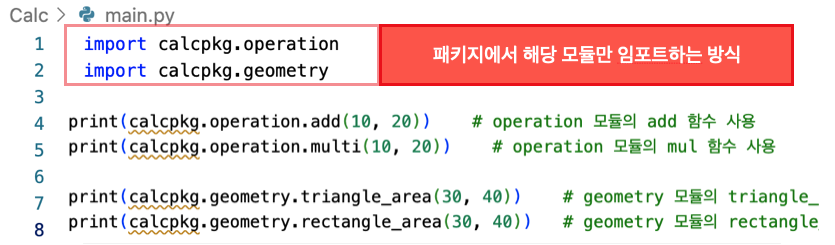

In [ ]:
# main 함수에 위의 내용이 기록되도록 함.

## 1.3. 이제 main.py 를 실행하여 동작하는지 확인하자.

In [4]:
# main.py 를 터미널에서 실행되는 형태로 실행해보자. (위치를 Calc 폴더 아래로 이동해야함.)
!python /content/Calc/main.py

30
200
600.0
1200


## 1.4. 해당 패키지를 호출하기 너무 기니까 main.py 에서 개별 모듈을 줄여서 부르도록 하자.


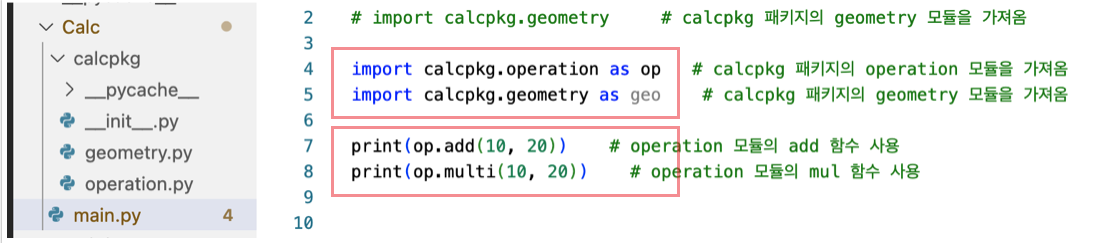

In [ ]:
# 다시 실행해보자 main.py
!python /content/Calc/main.py

30
200
600.0
1200


## 1.5. 이보다 더 줄여서 from  구문으로 함수 이름만 갖고 오도록 하자.

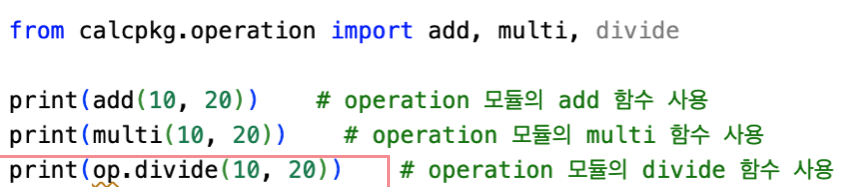

In [6]:
# 위의 세 문장이 수행되도록 함.
!python /content/Calc/main3.py

30
200
0.5


# 2. 패키지의 응용

## 2.1. import * 을 사용하여 전체 함수명만 사용하게 함.

In [7]:
# main.py 의 임포트 형식을 전체 함수로 확장한 후 재실행 해보기.
!python /content/Calc/main3.py

30
200
0.5


## 2.2. operator.py 와 geometry.py 에 try-except 를 활용하여 0 으로 나뉠 경우에 대한 에러 발생하도록 함.

In [ ]:
# 파일 수정

## 2.3. geometry 에 사각형 둘레를 계산하는 함수 rectangle_circum() 도 추가.

In [ ]:
# 파일 수정

In [8]:
!pwd

/content


In [9]:
!ls

Calc  sample_data


In [10]:
%cd Calc

/content/Calc


In [11]:
!pwd

/content/Calc


In [12]:
!ls

Calcpkg  main3.py  main4.py  main5.py  main.py	test_numbers.txt


## 2.4. 데이터 test_numbers.txt 를 데이터 프레임으로 불러오도록 main2.py 에 작성함.

### 이때, 분리자를 무엇으로 할 지, 그리고 맨 위의 정보가 자동으로 컬럼 이름이 되는데 이렇게 되지 않으려면 어떻게 해야하는지 주의해서 처리함.

In [ ]:
# 데이터를 임포트 하여 df 에 데이터프레임으로 저장.
# 컬럼 이름을 'type' 'width' 'height' 로 변경 (여기서 테스트하고 main2.py 에 반영)

In [13]:
import pandas as pd
df = pd.read_csv('test_numbers.txt', sep ='\t', header = None)
df.columns = ['type', 'width', 'height']
df.head()

,type,width,height
0,T,2,3
1,T,10,14
2,R,20,15
3,R,144,233


## 2.5. 데이터 프레임에 있는 값들을 한 줄씩 (row) 확인하면서, T 이면 삼각형 함수로 넓이만 계산, R 이면 사각형으로 둘레와 넓이계산하여 출력하도록 함.

In [14]:
# for, if-elif 구문 을 활용하여 코드 작성
import pandas as pd
from Calcpkg.geometry import *

df = pd.read_csv('test_numbers.txt', sep ='\t', header = None)
df.columns = ['type', 'width', 'height']
df['result'] = None

for row in df.index:
  type_ = loc.df[row,'type']
  width = loc.df[row,'width']
  height = loc.df[row,'height']

  if type_ == 'T':
    tri_area = triangle_area(width, height)
    print(tri_area, file = f)

  else:
    rec_area = rectangle_area(width, height)
    rec_cir = rectangle_circum(width, height)
    print(rec_area, rec_cir, file = f)

TypeError: ignored

In [19]:
import pandas as pd
from Calcpkg.geometry import *

df = pd.read_csv('test_numbers.txt', sep ='\t', header = None)
df.columns = ['type', 'width', 'height']
df['result'] = None

for row in df.index:
  type_ = df.loc[row,'type']
  width = df.loc[row,'width']
  height = df.loc[row,'height']

  if type_ == 'T':
    tri_area = triangle_area(width, height)
    df.at[row, 'result'] = tri_area

  elif type_ == 'R':
    rec_area = rectangle_area(width, height)
    rec_cir = rectangle_circum(width, height)
    df.at[row, 'result'] = 'Area:{}, circum : {}'.format(rec_area, rec_cir)

print(df)

  type  width  height                    result
0    T      2       3                       3.0
1    T     10      14                      70.0
2    R     20      15     Area:300, circum : 70
3    R    144     233  Area:33552, circum : 754


# 3. 클래스를 임포트

In [ ]:
# Person 클래스를 모듈로 만듦 (응?)

In [ ]:
# person 모듈 안의 Person 클래스로 자기 자신의 이름을 갖는 인스턴스 형성하여 인사 greeting() 하는 코드를 main4.py 에 작성